In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

In [2]:
np.random.seed(0)
SAMPLES = 1000
NOISE = 0.01
COEF = np.array([1, -2.1, 3, -1])  #b0, b1, b2, b3
K = range(1000)

### Generate multidimensional data with high correlation between two of the features

We will be using a 3D example

In [3]:
def generate_dataset(correlated = True):
    # Create a sample with three independent variables, two of them highly correlated
    # The first column in X corresponds to the intercept coefficient
    X = np.random.rand(SAMPLES, 2)
    if correlated:
        X = np.hstack((X, X[:, 1][:, np.newaxis] + NOISE * np.random.randn(SAMPLES, 1) + NOISE * 100))    
    else:
        X = np.hstack((X, np.random.rand(SAMPLES, 1)))
    X = np.hstack((np.ones((SAMPLES, 1)), X))
    # Calculating the value of the dependent variable before adding noise
    y = np.dot(X, COEF)
    # Adding some normal random noise
    X[:, 1:] = X[:, 1:] + NOISE * np.random.randn(SAMPLES, 3)
    
    return (X, y)
(X, y) = generate_dataset()

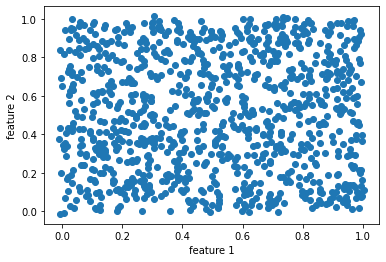

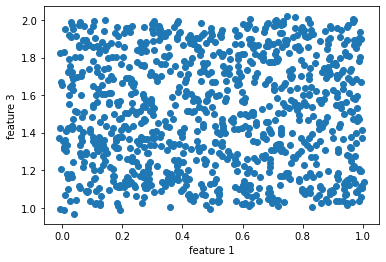

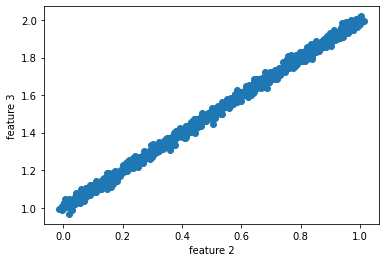

In [4]:
for ind in list(combinations(range(1, X.shape[1]), 2)):
    _, ax = plt.subplots()
    ax.scatter(X[:, ind[0]], X[:, ind[1]])
    ax.set_xlabel('feature ' + str(ind[0]))
    ax.set_ylabel('feature ' + str(ind[1]))

In [5]:
# Show the effect of colinearity on least squares
def test_impact_colinearity(correlated=True):
    print('Actual coefficients = ' + str(COEF))
    res = []
    for i in range(10):
        (X, y) = generate_dataset(correlated=correlated)
        res.append(np.dot(y, np.dot(X, np.linalg.inv(np.dot(X.T, X)))))
        print(res[-1])
    print('Standard deviation: '+ str(np.std(np.array(res), axis = 0)))

In [6]:
test_impact_colinearity(correlated=True)

Actual coefficients = [ 1.  -2.1  3.  -1. ]
[-0.29561295 -2.10144652  1.70292883  0.29686529]
[-0.30010791 -2.09158947  1.70614084  0.29484826]
[-0.32518116 -2.0904304   1.6631954   0.32499292]
[-0.31123852 -2.09993458  1.68456083  0.31359005]
[-0.26529213 -2.0990488   1.73093262  0.26537673]
[-0.3024849  -2.09660418  1.70013194  0.30044501]
[-0.32906567 -2.09526907  1.67376807  0.32736754]
[-0.307055   -2.09873035  1.68512     0.30926522]
[-0.31329687 -2.098473    1.68304979  0.31303   ]
[-0.34703497 -2.09917937  1.64904735  0.34782501]
Standard deviation: [0.02084569 0.00343556 0.02218553 0.02111942]


In [7]:
# Are we sure that this is not noise effect?
# Yes, the variability of the highly correlated dependent variables is an 
# order of magnitude higher than those that are not correlated (see cell above)
test_impact_colinearity(correlated=False)

Actual coefficients = [ 1.  -2.1  3.  -1. ]
[ 0.99609024 -2.08898972  2.99241214 -0.99794265]
[ 0.98996236 -2.08752311  2.99735739 -0.99696569]
[ 1.00013392 -2.0945302   2.99858533 -1.00742336]
[ 0.99611935 -2.09644487  3.00207037 -0.99954537]
[ 0.99583125 -2.09334866  2.99421824 -0.99635442]
[ 1.00151601 -2.09887052  3.00019639 -1.00198594]
[ 1.00298771 -2.09798845  2.99352852 -1.00267996]
[ 1.00646821 -2.09979221  2.99177855 -1.00197041]
[ 0.98852042 -2.09497764  3.001925   -0.98873086]
[ 1.00196243 -2.1048347   2.99407474 -0.99577138]
Standard deviation: [0.00543637 0.00485111 0.00371478 0.00480236]


In [8]:
# Ridge regression implementation
def ridge_regression(k, X, y):
    return np.dot(y, np.dot(X, np.linalg.inv(np.dot(X.T, X) + k * np.identity(X.shape[1]))))

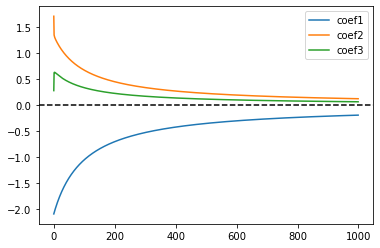

In [9]:
# Selecting k with a ridge trace
trace = pd.DataFrame(index = K, columns = ['coef0', 'coef1', 'coef2', 'coef3'])
for k in K:
    trace.loc[k] = ridge_regression(k, X, y)

fig, ax = plt.subplots()
for i in range(1, X.shape[1]):
    ax.plot(trace['coef' + str(i)])
plt.axhline(y=0, color='k', linestyle='--')
ax.legend(trace.columns[1:])

In [10]:
# Check that there is less variance with that k - add RMSE

In [11]:
# Another way of selecting k is cross validation, but I am not implementing that